In [61]:
import matplotlib.pyplot as plt
import torch
import torchvision.datasets


In [62]:
def synthetic_data(w,b,num):
    x=torch.normal(0,1,[num,len(w)])
    y = torch.matmul(x, w) + b
    y+=torch.normal(0,0.01,y.shape)
    return x,y.reshape(-1,1)
initial_w=torch.tensor([2,3.4])
initial_b=4.2
features,labels=synthetic_data(initial_w,initial_b,1000)

In [63]:
len(features[:,1]),len(labels[:,0])

(1000, 1000)

In [64]:
# plt.scatter(features[:,1],labels[:,0])

In [65]:
# import random
# # 本函数已保存在d2lzh包中方便以后使用
# def data_iter(batch_size, features, labels):
#     num_examples = len(features)
#     indices = list(range(num_examples))
#     random.shuffle(indices)  # 样本的读取顺序是随机的
#     for i in range(0, num_examples, batch_size):
#         j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
#         yield  features.index_select(0, j), labels.index_select(0, j)
# batch_size = 10
#
# for X, y in data_iter(batch_size, features, labels):
#     print(X, y)
#     break


In [66]:
import random


def data_iter(batch_size,features,labels):
    num=len(features)
    indices=list(range(num))
    random.shuffle(indices)

    for i in range(0,num,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num)])
        return features.index_select(0,batch_indices),labels.index_select(0,batch_indices)
batch_size = 10

x,y=data_iter(batch_size,features,labels)
x,y

(tensor([[-1.5416,  0.9098],
         [-0.4207,  0.7366],
         [-0.5206,  0.0631],
         [-1.5928, -2.2445],
         [ 0.3416,  1.3888],
         [-0.8767,  1.5081],
         [-0.7026,  0.7748],
         [ 0.8066, -0.7219],
         [ 0.2504, -0.3366],
         [ 0.3929,  0.4144]]),
 tensor([[ 4.2134],
         [ 5.8673],
         [ 3.3882],
         [-6.6092],
         [ 9.6176],
         [ 7.5656],
         [ 5.4244],
         [ 3.3698],
         [ 3.5590],
         [ 6.3935]]))

In [67]:
w=torch.normal(0,0.01,(2,1),requires_grad=True)
# w=torch.zeros((2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)
w,b

(tensor([[-0.0138],
         [ 0.0138]], requires_grad=True),
 tensor([0.], requires_grad=True))

In [68]:
def linear(x,w,b):
    return torch.matmul(x,w)+b

In [69]:
def sgd(params, lr,batch_size):
    for param in params:
        param.data-=(lr*param.grad)/batch_size

In [70]:
def squared_loss(y_hat , y):  #@save
    """均方损失"""
    return (y_hat  - y.reshape(y_hat.shape)) ** 2 / 2

In [71]:
lr=0.01
num_epochs=3
net=linear
loss=squared_loss


In [72]:
for epoch in range(num_epochs):
    for i in range(100):
        x,y=data_iter(batch_size,features,labels)
        l=loss(net(x,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l=loss(net(features,w,b),labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 1.986610
epoch 2, loss 0.266951
epoch 3, loss 0.031089


In [73]:
print(f'w的估计误差: {initial_w - w.reshape(initial_w.shape)}')
print(f'b的估计误差: {initial_b - b}')

w的估计误差: tensor([0.0711, 0.1433], grad_fn=<SubBackward0>)
b的估计误差: tensor([0.1957], grad_fn=<RsubBackward1>)


简洁实现

In [74]:
def synthetic_data(w,b,num):
    x=torch.normal(0,1,[num,len(w)])
    y = torch.matmul(x, w) + b
    y+=torch.normal(0,0.01,y.shape)
    return x,y.reshape(-1,1)
initial_w=torch.tensor([2,3.4])
initial_b=4.2
features,labels=synthetic_data(initial_w,initial_b,1000)

In [75]:
from torch.utils import data
def load_array(data_arrays,batch_size,is_train=True):
    dataset=data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle=is_train)

data_iter=load_array((features,labels),batch_size)

In [76]:
# next(iter(data_iter))

In [77]:
from torch import nn
net=nn.Sequential(nn.Linear(2,1))

In [78]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

In [79]:
loss=nn.MSELoss()

In [80]:
trainer=torch.optim.SGD(net.parameters(),lr=0.01)

In [81]:
for epoch in range(num_epochs):
    for x,y in data_iter:
        l=loss(net(x),y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l=loss(net(features),labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.623857
epoch 2, loss 0.012189
epoch 3, loss 0.000338


In [82]:
w = net[0].weight.data
print('w的估计误差：', initial_w - w.reshape(initial_w.shape))
b = net[0].bias.data
print('b的估计误差：', initial_b - b)

w的估计误差： tensor([0.0043, 0.0078])
b的估计误差： tensor([0.0125])


MINST

In [83]:
import torchvision
import torchvision.transforms as transforms
mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())
mnist_test,mnist_train

(Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: C:\Users\sunyu/Datasets/FashionMNIST
     Split: Test
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: C:\Users\sunyu/Datasets/FashionMNIST
     Split: Train
     StandardTransform
 Transform: ToTensor())

In [84]:
mnist_train[0][0].size()

torch.Size([1, 28, 28])

In [85]:
feature,label=mnist_train[0]
print(feature.shape,label)

torch.Size([1, 28, 28]) 9


In [86]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [87]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

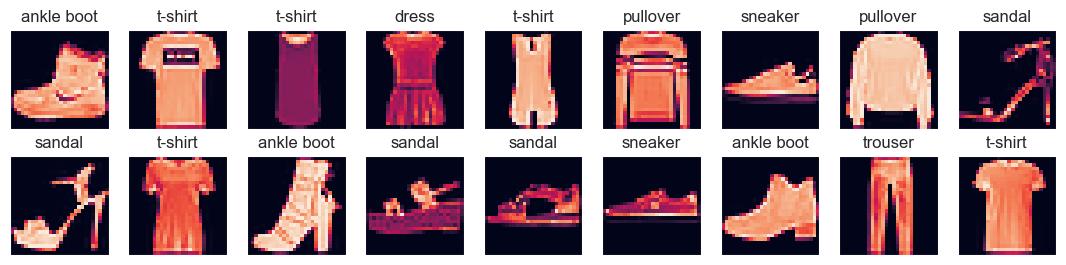

In [88]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

In [89]:
batch_size=256
threat_num=4
train_iter=data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=threat_num)
test_iter=data.DataLoader(mnist_test,batch_size,shuffle=True,num_workers=threat_num)

In [90]:
import time

start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))


2.87 sec


In [91]:
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([256, 1, 28, 28]) torch.float32 torch.Size([256]) torch.int64


In [92]:
num_inputs=784
num_outputs=10

w=torch.normal(0,0.01,[num_inputs,num_outputs],requires_grad=True)
b=torch.zeros(num_outputs,requires_grad=True)
w,b

(tensor([[ 0.0129, -0.0092, -0.0015,  ...,  0.0088,  0.0023,  0.0134],
         [-0.0070,  0.0065, -0.0070,  ..., -0.0192,  0.0038,  0.0123],
         [-0.0076, -0.0043, -0.0197,  ..., -0.0130,  0.0140,  0.0044],
         ...,
         [ 0.0201, -0.0130,  0.0049,  ...,  0.0020,  0.0149, -0.0028],
         [ 0.0058,  0.0096, -0.0127,  ..., -0.0040, -0.0055,  0.0028],
         [-0.0058,  0.0106, -0.0055,  ..., -0.0056, -0.0080,  0.0241]],
        requires_grad=True),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True))

In [93]:
def softmax(x):
    x_exp=torch.exp(x)
    partition=x_exp.sum(1,keepdim=True)
    return  x_exp/partition

In [94]:
x=torch.normal(0,1,[2,5])
x
x_pre=softmax(x)
x_pre,x_pre.sum(1)

(tensor([[0.0309, 0.0078, 0.0204, 0.0927, 0.8482],
         [0.0383, 0.1921, 0.2788, 0.1521, 0.3388]]),
 tensor([1.0000, 1.0000]))

In [95]:
def net(X):
    return softmax(torch.mm(X.view((-1, num_inputs)), w) + b)


In [96]:
y=torch.tensor([0,2])
y

tensor([0, 2])

In [97]:
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
def cross_entropy(y_hat, y):
    return - torch.log(y_hat[range(len(y_hat)), y])

cross_entropy(y_hat, y)

tensor([2.3026, 0.6931])

In [98]:
def accuracy(y_hat,y):
    # return (y_hat.argmax(dim=1)==y).float().mean().item()
    return  (y_hat.argmax(dim=1)==y).float().mean().tolist()

In [99]:
print(accuracy(y_hat, y))

0.5


In [100]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用。该函数将被逐步改进：它的完整实现将在“图像增广”一节中描述
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n


In [101]:
print(evaluate_accuracy(test_iter, net))


0.0649


In [102]:
num_epochs, lr = 5, 0.1

# 本函数已保存在d2lzh包中方便以后使用
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()

            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()

            l.backward()
            if optimizer is None:
                sdg(params, lr, batch_size)
            else:
                optimizer.step()  # “softmax回归的简洁实现”一节将用到


            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [w, b], lr)


epoch 1, loss 0.7868, train acc 0.750, test acc 0.795
epoch 2, loss 0.5705, train acc 0.813, test acc 0.813
epoch 3, loss 0.5254, train acc 0.826, test acc 0.818
epoch 4, loss 0.5013, train acc 0.831, test acc 0.823
epoch 5, loss 0.4851, train acc 0.838, test acc 0.826


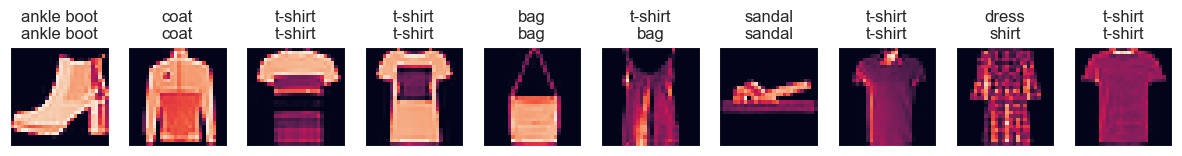

In [103]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = get_fashion_mnist_labels(y)
    preds = get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter,10)

In [104]:
import torchvision
import torchvision.transforms as transforms
mnist_train = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root='~/Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())
batch_size=256
threat_num=4
train_iter=data.DataLoader(mnist_train,batch_size,shuffle=True,num_workers=threat_num)
test_iter=data.DataLoader(mnist_test,batch_size,shuffle=True,num_workers=threat_num)

In [105]:
num_inputs = 784
num_outputs = 10

net=nn.Sequential(nn.Flatten(),nn.Linear(num_inputs,num_outputs))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,std=0.01)
net.apply(init_weights)




Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)

In [106]:
loss=nn.CrossEntropyLoss()

In [107]:
trainer=torch.optim.SGD(net.parameters(),0.01)

In [108]:
def train_softmax(net,train_iter,test_iter,loss,num_epochs,optimizer):
    l1=[]
    l2=[]
    for epoch in range(num_epochs):
        sum_loss,acc_train,n_train,acc_test,n_test=0,0,0,0,0
        for x,y in train_iter:
            k=net(x)
            l=loss(k,y)
            optimizer.zero_grad()
            l.backward()
            optimizer.step()

            sum_loss+=l.item()
            acc_train+=(k.argmax(dim=1)==y).float().sum().item()
            n_train+=y.shape[0]
        for x,y in test_iter:
            k=net(x)
            acc_test+=(k.argmax(dim=1)==y).float().sum().item()
            n_test+=y.shape[0]
        # print("epoch: "+str(epoch+1))
        # print("acc_train: "+ str(acc_train/n_train))
        # print("test_acc: "+str(acc_test/n_test))
        l1.append(acc_train/n_train)
        l2.append(acc_test/n_test)
    plt.plot(range(10),l1)
    plt.plot(range(10),l2)
    plt.legend(['train_acc','test_acc'])
    plt.show()

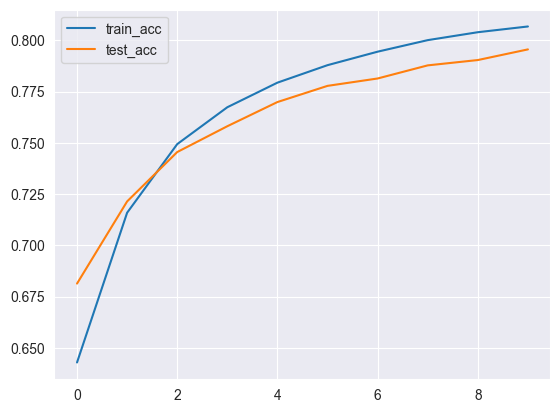

In [109]:
num_epochs = 10
train_softmax(net,train_iter,test_iter,loss,num_epochs,trainer)